In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Reading Dataset
df=pd.read_csv('../Dataset/Diabetes.csv')

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
df.shape

(768, 9)

- As Few Misconceptions are there like BMI, BP, Glucose, Insulin, cant be zero. For that Purpose we will have to Impute them.

In [7]:
# df['BMI']=df['BMI'].replace(0,df['BMI'].mean())

In [8]:
# df['BloodPressure']=df['BloodPressure'].replace(0,df['BloodPressure'].mean())
# df['Glucose']=df['Glucose'].replace(0,df['Glucose'].mean())
# df['Insulin']=df['Insulin'].replace(0,df['Insulin'].mean())
# df['SkinThickness']=df['SkinThickness'].replace(0,df['SkinThickness'].mean())

<Axes: >

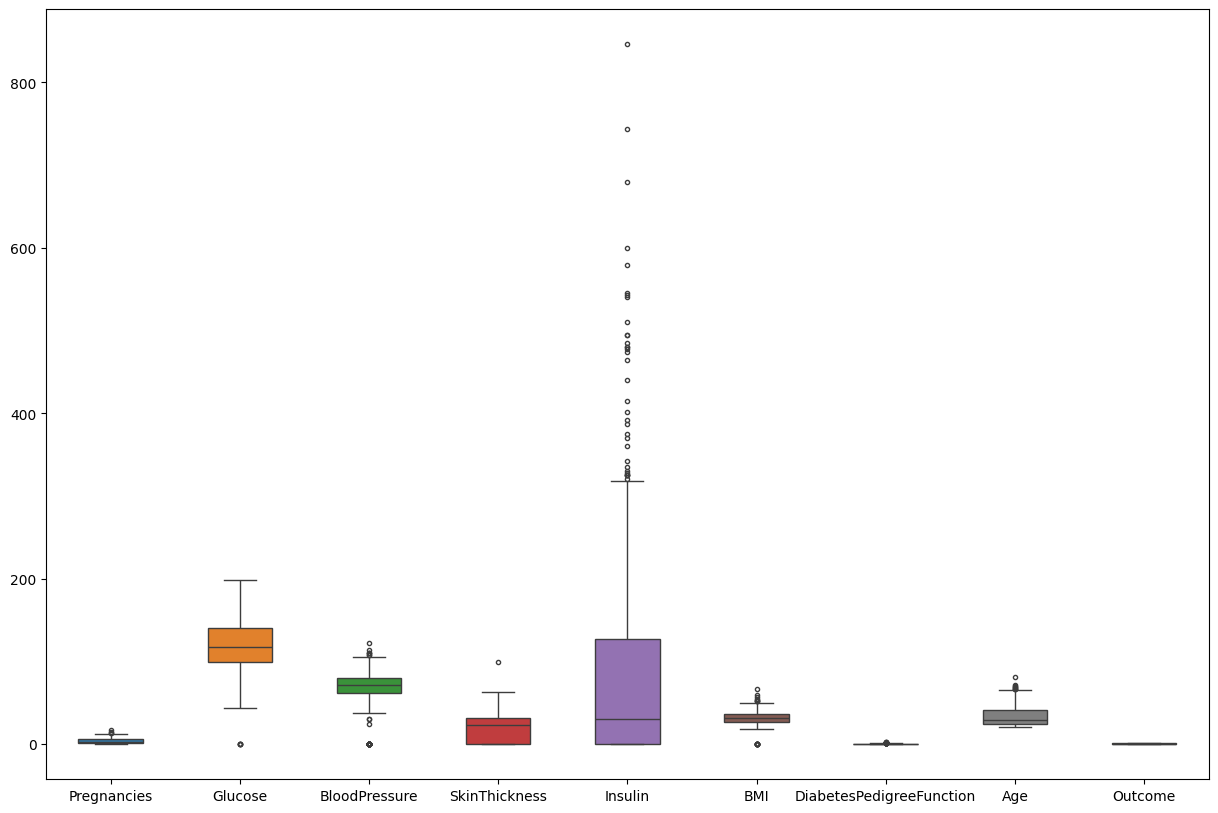

In [9]:
# Boxplot by detecting Outliers
fig,ax=plt.subplots(figsize=(15,10))
sns.boxplot(data=df,width=0.5,ax=ax,fliersize=3)

In [10]:
# Dependent and Independent Variables
X=df.drop(columns=['Outcome'])
y=df['Outcome']

In [11]:
X.shape

(768, 8)

In [12]:
y.shape

(768,)

In [13]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [15]:
X_train.shape,X_test.shape

((614, 8), (154, 8))

In [20]:
import pickle
def scaler_standard(X_train,X_test):
    Standardscaler=StandardScaler()
    X_train_scaled=Standardscaler.fit_transform(X_train)
    X_test_scaled=Standardscaler.transform(X_test)

    # saving the file
    with open('../Model/Standardscaler.pkl', 'wb') as file:
        pickle.dump(Standardscaler, file)

    return X_train_scaled,X_test_scaled

In [21]:
X_train_scaled,X_test_scaled=scaler_standard(X_train,X_test)

In [22]:
classifier=LogisticRegression()

In [23]:
classifier.fit(X_train_scaled,y_train)

LogisticRegression()

In [24]:
## HyperParamter Tuning 
## GridSearch CV
from sklearn.model_selection import GridSearchCV
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [25]:
# Parameter Grid
parameters= {
    'penalty' : ['l1','l2'],
    'C' : np.logspace(-3,3,7),
    'solver' : ['newton-cg','lbfgs','liblinear']
}

In [26]:
logreg=LogisticRegression()
clf=GridSearchCV(
    logreg,
    param_grid=parameters,
    scoring='accuracy',
    cv=10
)
clf.fit(X_train_scaled,y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']},
             scoring='accuracy')

In [27]:
clf.best_params_

{'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}

In [28]:
clf.best_score_

0.763802221047065

In [29]:
y_pred=clf.predict(X_test_scaled)

In [30]:
print(accuracy_score(y_test,y_pred))

0.8181818181818182


In [32]:
conf_mat=confusion_matrix(y_test,y_pred)

In [33]:
conf_mat

array([[97, 10],
       [18, 29]], dtype=int64)

In [34]:
true_positive=conf_mat[0][0]
false_positive=conf_mat[0][1]
false_negative=conf_mat[1][0]
true_negative=conf_mat[1][1]

In [35]:
Accuracy=(true_positive+true_negative)/(true_negative+true_positive+false_negative+false_positive)

In [36]:
Accuracy

0.8181818181818182

In [37]:
file=open('../Model/Prediction.pkl','wb')
pickle.dump(classifier,file)
file.close()